# MNIST 데이터 분석 Baseline code

## 1. 패키지 불러오기

In [1]:
import os
os.chdir('C:\BigData\SooDa\ML1\Baseline_code')

import input_data
import numpy as np
import matplotlib.pylab as plt

## 2. MNIST 데이터 둘러보기

In [2]:
mnist_images = input_data.read_data_sets("./mnist_data", one_hot=False)  # MNIST 데이터를 불러와서 저장

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


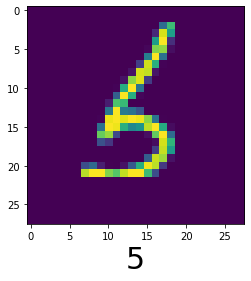

In [3]:
# 랜덤으로 25개 데이터를 뽑아서 저장, (X:이미지 , Y:정답라벨) 형태
pic,real_values = mnist_images.train.next_batch(25)   

index = 11 # 0~24 정수 입력해보기
image = pic[index,:]
image = np.reshape(image,[28,28])
plt.imshow(image)
plt.xlabel(real_values[index], fontsize=30)
plt.show()

# 이미지(X)와 정답라벨(Y)가 출력됨

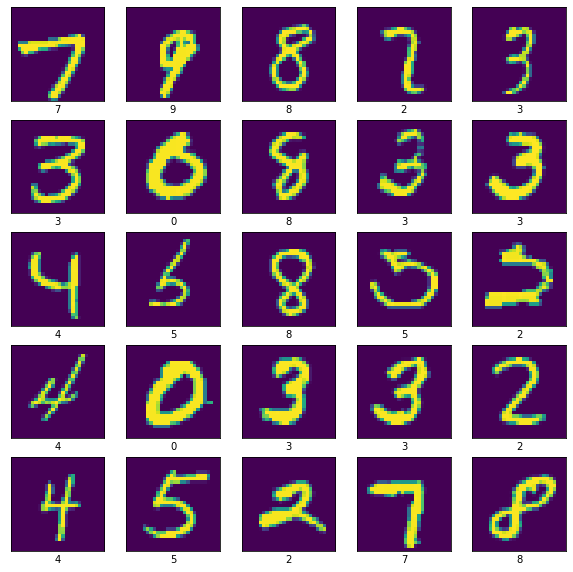

In [4]:
# 더 많이 둘러보기

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(pic[i,:] , [28,28])
    plt.imshow(image)
    plt.xlabel(real_values[i])
plt.show()

## 3. 데이터셋 만들기

In [5]:
# Download Data : http://yann.lecun.com/exdb/mnist/
# Data input script : https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist

mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot=True)

Extracting ./samples/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./samples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# 데이터 개수 확인하기
print("the number of train examples :" , mnist.train.num_examples)
print("the number of test examples :" , mnist.test.num_examples)

the number of train examples : 55000
the number of test examples : 10000


In [11]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# MNIST data image of shape 28 * 28 = 784
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X : batch_xs, Y : batch_ys})
            avg_cost += c / total_batch

        print( print ("Epoch:", '%04d' %(epoch + 1), "cost=", "{:.9f}".format(avg_cost))) 
        # Test the model using test sets
        print("Accuracy: ", accuracy.eval(session = sess,
              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

Epoch: 0001 cost= 2.669185150
None
Accuracy:  0.7558
Epoch: 0002 cost= 1.077436180
None
Accuracy:  0.8158
Epoch: 0003 cost= 0.866608470
None
Accuracy:  0.8382
Epoch: 0004 cost= 0.763159219
None
Accuracy:  0.8492
Epoch: 0005 cost= 0.696172290
None
Accuracy:  0.8584
Epoch: 0006 cost= 0.649419451
None
Accuracy:  0.8632
Epoch: 0007 cost= 0.612761414
None
Accuracy:  0.8678
Epoch: 0008 cost= 0.583721848
None
Accuracy:  0.8717
Epoch: 0009 cost= 0.559317749
None
Accuracy:  0.8737
Epoch: 0010 cost= 0.539360305
None
Accuracy:  0.8762
Epoch: 0011 cost= 0.521995343
None
Accuracy:  0.8783
Epoch: 0012 cost= 0.506404982
None
Accuracy:  0.8806
Epoch: 0013 cost= 0.493269242
None
Accuracy:  0.8831
Epoch: 0014 cost= 0.481300569
None
Accuracy:  0.8838
Epoch: 0015 cost= 0.470457927
None
Accuracy:  0.8867


## epochs 증가 - underfitting?

In [12]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# MNIST data image of shape 28 * 28 = 784
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 40
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X : batch_xs, Y : batch_ys})
            avg_cost += c / total_batch

        print( print ("Epoch:", '%04d' %(epoch + 1), "cost=", "{:.9f}".format(avg_cost))) 
        # Test the model using test sets
        print("Accuracy: ", accuracy.eval(session = sess,
              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

Epoch: 0001 cost= 2.962275089
None
Accuracy:  0.7532
Epoch: 0002 cost= 1.139633244
None
Accuracy:  0.8121
Epoch: 0003 cost= 0.902993198
None
Accuracy:  0.8364
Epoch: 0004 cost= 0.786234341
None
Accuracy:  0.8483
Epoch: 0005 cost= 0.713443163
None
Accuracy:  0.8582
Epoch: 0006 cost= 0.661528999
None
Accuracy:  0.8635
Epoch: 0007 cost= 0.622603896
None
Accuracy:  0.8692
Epoch: 0008 cost= 0.591753700
None
Accuracy:  0.8745
Epoch: 0009 cost= 0.566953007
None
Accuracy:  0.8768
Epoch: 0010 cost= 0.545534903
None
Accuracy:  0.8784
Epoch: 0011 cost= 0.527681165
None
Accuracy:  0.8806
Epoch: 0012 cost= 0.511852419
None
Accuracy:  0.8812
Epoch: 0013 cost= 0.498553473
None
Accuracy:  0.8837
Epoch: 0014 cost= 0.486055076
None
Accuracy:  0.8861
Epoch: 0015 cost= 0.474898752
None
Accuracy:  0.8873
Epoch: 0016 cost= 0.465557918
None
Accuracy:  0.8883
Epoch: 0017 cost= 0.456462296
None
Accuracy:  0.889
Epoch: 0018 cost= 0.448164481
None
Accuracy:  0.8902
Epoch: 0019 cost= 0.440531151
None
Accuracy:  0

## batch_size 감소 - overfitting?

In [17]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# MNIST data image of shape 28 * 28 = 784
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 10

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X : batch_xs, Y : batch_ys})
            avg_cost += c / total_batch

        print( print ("Epoch:", '%04d' %(epoch + 1), "cost=", "{:.9f}".format(avg_cost))) 
        # Test the model using test sets
        print("Accuracy: ", accuracy.eval(session = sess,
              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

Epoch: 0001 cost= 0.967841650
None
Accuracy:  0.8775
Epoch: 0002 cost= 0.517077625
None
Accuracy:  0.8935
Epoch: 0003 cost= 0.440062766
None
Accuracy:  0.9037
Epoch: 0004 cost= 0.400231024
None
Accuracy:  0.9032
Epoch: 0005 cost= 0.374878097
None
Accuracy:  0.9103
Epoch: 0006 cost= 0.356651955
None
Accuracy:  0.9102
Epoch: 0007 cost= 0.343245837
None
Accuracy:  0.9157
Epoch: 0008 cost= 0.332107135
None
Accuracy:  0.91
Epoch: 0009 cost= 0.323603264
None
Accuracy:  0.912
Epoch: 0010 cost= 0.315842694
None
Accuracy:  0.906
Epoch: 0011 cost= 0.311144000
None
Accuracy:  0.9123
Epoch: 0012 cost= 0.304349280
None
Accuracy:  0.9129
Epoch: 0013 cost= 0.301420589
None
Accuracy:  0.9169
Epoch: 0014 cost= 0.297321306
None
Accuracy:  0.9131
Epoch: 0015 cost= 0.292908750
None
Accuracy:  0.9169


## Overfitting 조정 - Dropout

In [15]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# MNIST data image of shape 28 * 28 = 784
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

keep_prob = tf.compat.v1.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
# 6.2.1
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
# 6.2.1
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

##########
# 신경망 모델 학습
##########

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# 6.2.3
for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # 6.2.2 -> 학습 코드 : keep_prob를 0.8로 넣어 준다.
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})

        total_cost += cost_val

    print('Epoch: ', '%04d' % (epoch+1),
          'Avg. Cost = ', '{:.3f}'.format(total_cost/total_batch))

print("최적화 완료")

##########
# 결과 확인
##########

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 6.2.2 -> 예측 코드 : keep_prob를 1로 넣어준다.
print('정확도: ', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch:  0001 Avg. Cost =  0.428
Epoch:  0002 Avg. Cost =  0.164
Epoch:  0003 Avg. Cost =  0.117
Epoch:  0004 Avg. Cost =  0.091
Epoch:  0005 Avg. Cost =  0.075
Epoch:  0006 Avg. Cost =  0.063
Epoch:  0007 Avg. Cost =  0.054
Epoch:  0008 Avg. Cost =  0.046
Epoch:  0009 Avg. Cost =  0.040
Epoch:  0010 Avg. Cost =  0.037
Epoch:  0011 Avg. Cost =  0.034
Epoch:  0012 Avg. Cost =  0.031
Epoch:  0013 Avg. Cost =  0.031
Epoch:  0014 Avg. Cost =  0.027
Epoch:  0015 Avg. Cost =  0.024
Epoch:  0016 Avg. Cost =  0.024
Epoch:  0017 Avg. Cost =  0.024
Epoch:  0018 Avg. Cost =  0.024
Epoch:  0019 Avg. Cost =  0.022
Epoch:  0020 Avg. Cost =  0.019
Epoch:  0021 Avg. Cost =  0.019
Epoch:  0022 Avg. Cost =  0.020
Epoch:  0023 Avg. Cost =  0.018
Epoch:  0024 Avg. Cost =  0.020
Epoch:  0025 Avg. Cost =  0.017
Epoch:  0026 Avg. Cost =  0.017
Epoch:  0027 Avg. Cost =  0.015
Epoch:  0028 Avg. Cos

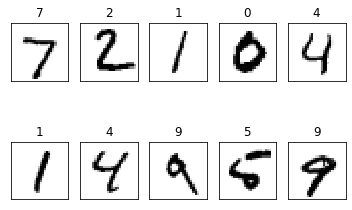

In [16]:
import matplotlib.pyplot as plt2
%matplotlib inline

##########
# 결과 확인 (matplotlib)
##########

# 6.3.2
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})

fig = plt2.figure()

for i in range(10):

    # 2행 5열의 그래프 생성 후 i+1 번째에 숫자 이미지를 출력
    subplot = fig.add_subplot(2, 5, i+1)

    # 이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않음
    subplot.set_xticks([])
    subplot.set_yticks([])

    # 출력한 이미지 위에 예측한 숫자를 출력
    # np.argmax는 tf.argmax와 같은 기능인 함수
    # 결과값인 labels의 i번째 요소가 원-핫 인코딩 형식을 되어 있음
    # 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력
    subplot.set_title('%d' % np.argmax(labels[i]))

    # 1차원 배열로 되어 있는 i번째 이미지 데이터를  28x28 형식의 2차원 배열로 변형하여 이미지 형태로 출력
    # cmap 파라미터를 통해 이미지를 그레이스케일로 출력
    subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)

# 6.3.5
plt.show()